# 编程练习3：多分类及神经网络

In [25]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat
from random import sample
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cg
from scipy.special import expit

In [26]:
raw_data = loadmat('ex3data1.mat')
X = np.mat(raw_data['X'])
y = np.mat(raw_data['y'])
m = len(y)

# 1 多分类
这一章我们对手写数字进行识别。
## 1.2 可视化
我们此采用画子图的方式，随机选100张图，画在10*10的子图上。

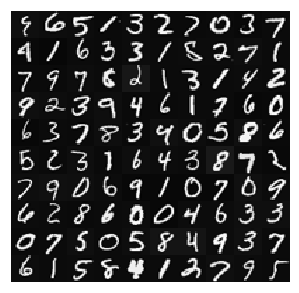

In [27]:
fig = plt.figure(figsize=(5,5))
sample_num = 100
idx = sample(range(0,m), sample_num)
for i in range(0, sample_num):
    plt.subplot(10, 10, i+1)
    plt.imshow(X[idx[i],:].reshape((20,20)).T, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

### 1.3 向量逻辑回归
我们在ex2中就已经用矩阵形式表示了J和grad，所以这里只关注一对多分类中的最小化过程。  
scipy提供了内置的fmin_cg函数，可以直接使用。需要注意，theta和grad的输出在课程和Matlab中是列向量，但在fmin_cg里认为是行向量，要调整一下。

In [16]:
X = np.column_stack([np.ones((m,1)), X])
x = np.zeros(X.shape[1])
lamda = 0.1
args = (X, y, lamda)
def J(x, *args):
    X,y,lamda = args
    theta = np.mat(x).reshape((X.shape[1],1))
    theta[0,0] = 0
    h_theta = expit(X*theta)
    m = len(y)
    cost = (-np.log(h_theta.T)*y - np.log(1-h_theta.T)*(1-y))/m + lamda/(2*m)*theta.T*theta
    return cost[0,0]
def grad(x, *args):
    X,y,lamda = args
    theta = np.mat(x).reshape((X.shape[1],1))
    theta[0,0] = 0
    h_theta = expit(X*theta)
    m = len(y)
    g = X.T*(h_theta-y)/m + lamda/m*theta
    return np.asarray(g).reshape(X.shape[1])
yn =np.mat(y, mask=)
#xopt, fopt, *full_output = fmin_cg(f=J, fprime=grad, x0=x, args=args, maxiter=5, full_output=True)

[ -5.00000000e+00   0.00000000e+00   0.00000000e+00  -7.74530186e-08
   3.19876600e-06   1.89536237e-05  -7.06376094e-04  -8.97395355e-04
  -3.72741263e-04  -1.10787541e-04  -1.37049401e-04  -4.11905416e-05
   3.09307938e-05   7.56273049e-05   1.66101324e-04   1.88959823e-04
   1.11618541e-04   3.44740605e-05   2.31849497e-07  -3.65944989e-07
   0.00000000e+00  -2.71480120e-07   2.68348312e-06   1.35802658e-06
   5.10971729e-05   9.29459372e-05  -1.13518367e-03  -4.04630781e-03
  -5.65616107e-03  -4.38249876e-03  -1.22936584e-03   1.06402725e-03
   1.67724463e-03   1.83122226e-03   1.41359436e-03   1.00669534e-03
   6.22600175e-04   2.88468971e-04   1.69300222e-04   4.53328568e-05
   1.64277642e-05   2.32894093e-06  -2.61429416e-05   6.07579192e-05
  -2.68789968e-04  -2.19152610e-03  -1.11673884e-02  -2.41869621e-02
  -3.12963830e-02  -2.35164217e-02  -1.04915336e-02  -4.58342103e-03
  -2.20552420e-03  -7.25689198e-03  -1.98220888e-02  -2.48313796e-02
  -1.34236274e-02  -3.68460614e-03